<a href="https://colab.research.google.com/github/lihui1625/deepleaning/blob/main/code4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels)=reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(train_data[0])


2110848/2110848 [==============================] - 0s 0us/step
8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])
print(decoded_newswire)
print(train_labels[0])


? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
3


In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, seq in enumerate(sequences):
    for j in seq:
      results[i, j] = 1.0
  return results

In [7]:
from tensorflow.keras.utils import to_categorical

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print(y_train)
print(y_test)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop", loss="categorical_crossentropy",metrics=["accuracy"])

x_val = x_train[:1000]
partial_x_train=x_train[1000:]
y_val = y_train[:1000]
partial_y_train=y_train[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))



Epoch 1/20
16/16 [==============================] - 5s 36ms/step - loss: 2.8257 - accuracy: 0.4764 - val_loss: 1.8860 - val_accuracy: 0.6040
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.5856 - accuracy: 0.6686 - val_loss: 1.4205 - val_accuracy: 0.6850
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.2101 - accuracy: 0.7428 - val_loss: 1.2424 - val_accuracy: 0.7250
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.9884 - accuracy: 0.7880 - val_loss: 1.1196 - val_accuracy: 0.7440
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8259 - accuracy: 0.8187 - val_loss: 1.0423 - val_accuracy: 0.7720
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6947 - accuracy: 0.8502 - val_loss: 0.9866 - val_accuracy: 0.7890
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5765 - accuracy: 0.8748 - val_loss: 0.9416 - val_accuracy: 0.7990
Epoch 8/20
16

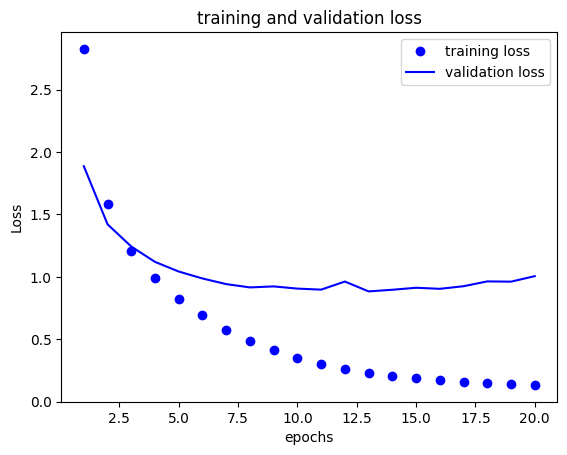

In [10]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_value = history_dict["loss"]
val_loss_value = history_dict["val_loss"]
epochs = range(1, len(loss_value) + 1)

plt.plot(epochs, loss_value, "bo", label="training loss")
plt.plot(epochs, val_loss_value, "b", label="validation loss")
plt.title("training and validation loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

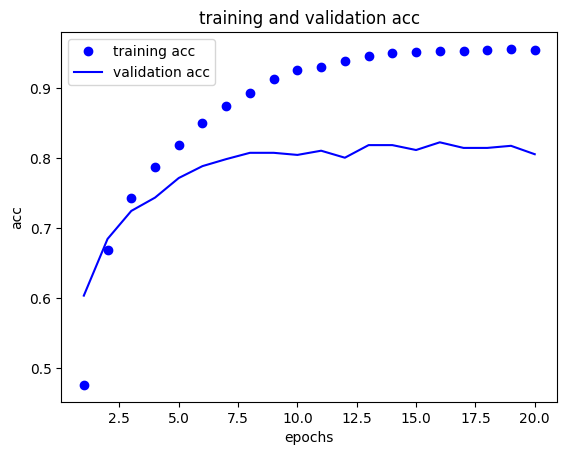

In [11]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="training acc")
plt.plot(epochs, val_acc, "b", label="validation acc")
plt.title("training and validation acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [12]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train, y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.5661 - accuracy: 0.5091
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.3830 - accuracy: 0.7067
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 1.0686 - accuracy: 0.7727
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 0.8699 - accuracy: 0.8141
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7212 - accuracy: 0.8427
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6018 - accuracy: 0.8676
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5050 - accuracy: 0.8896
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4271 - accuracy: 0.9077
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9184 - accuracy: 0.7916
[0.9184348583221436, 0.7916295528411865]


In [13]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = (np.array(test_labels) == np.array(test_labels_copy))
hits_array.mean()


0.19456812110418523

In [14]:
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))


71/71 [==============================] - 0s 2ms/step
(46,)
0.99999994
4


In [18]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

print(train_labels)
print(test_labels)
print(y_train)
print(y_test)

model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train, y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

[ 3  4  3 ... 25  3 25]
[ 3 10  1 ...  3  3 24]
[ 3  4  3 ... 25  3 25]
[ 3 10  1 ...  3  3 24]
Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 0.3292 - accuracy: 0.9259
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 0.2686 - accuracy: 0.9393
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 0.2378 - accuracy: 0.9450
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.2145 - accuracy: 0.9482
Epoch 5/9
18/18 [==============================] - 0s 13ms/step - loss: 0.1928 - accuracy: 0.9508
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.1803 - accuracy: 0.9506
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.1644 - accuracy: 0.9518
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 0.1573 - accuracy: 0.9545
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 1.0070 - accuracy: 0.7943
[1.0069719552993774, 0.